In [205]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("car_evaluation.csv")

* buying – Buying price

      Values: vhigh, high, med, low

* maint – Maintenance Cost

      Values: vhigh, high, med, low

* doors – Number of Door

      Values: 2, 3, 4, 5more

* persons – Capacity of person

      Values: 2, 4, more

* lug_boot – Luggage size

      Values: small, med, big

* safety – Safety

      Values: low, med, high
* decision – Car acceptability

      Values:unacc,acc,good,vgood

In [207]:
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [208]:
df.shape

(1727, 7)

In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   vhigh    1727 non-null   object
 1   vhigh.1  1727 non-null   object
 2   2        1727 non-null   object
 3   2.1      1727 non-null   object
 4   small    1727 non-null   object
 5   low      1727 non-null   object
 6   unacc    1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [210]:
True_column_list = ["buying","maintenance","numberOfDoors","numberOFPerson","lug_boot","safety","decision"]
df.columns = True_column_list

In [211]:
df.head()

,buying,maintenance,numberOfDoors,numberOFPerson,lug_boot,safety,decision
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [212]:
df.isnull().sum()

,0
buying,0
maintenance,0
numberOfDoors,0
numberOFPerson,0
lug_boot,0
safety,0
decision,0


In [213]:
from sklearn.preprocessing import OrdinalEncoder
buying_maint_Encoding = ["low","med","high","vhigh"]
lug_encoding = ["small", "med", "big"]
safety_encoding = ["low", "med", "high"]
decision_encoder = ["unacc","acc","good","vgood"]

ordinal = OrdinalEncoder(categories=[buying_maint_Encoding])
df["buying"] = ordinal.fit_transform(df[["buying"]])
df["maintenance"] = ordinal.fit_transform(df[["maintenance"]])

ordinal = OrdinalEncoder(categories=[lug_encoding])
df["lug_boot"] = ordinal.fit_transform(df[["lug_boot"]])

ordinal = OrdinalEncoder(categories=[safety_encoding])
df["safety"] = ordinal.fit_transform(df[["safety"]])

ordinal = OrdinalEncoder(categories=[decision_encoder])
df["decision"] = ordinal.fit_transform(df[["decision"]])

In [214]:
df.head()

,buying,maintenance,numberOfDoors,numberOFPerson,lug_boot,safety,decision
0,3.0,3.0,2,2,0.0,1.0,0.0
1,3.0,3.0,2,2,0.0,2.0,0.0
2,3.0,3.0,2,2,1.0,0.0,0.0
3,3.0,3.0,2,2,1.0,1.0,0.0
4,3.0,3.0,2,2,1.0,2.0,0.0


In [215]:
print(df["numberOFPerson"].unique())
print(df["numberOfDoors"].unique())

['2' '4' 'more']
['2' '3' '4' '5more']


In [216]:
df["numberOFPerson"] = df["numberOFPerson"].str.replace("more","5")
df["numberOFPerson"] = df["numberOFPerson"].astype("int64")

df["numberOfDoors"] = df["numberOfDoors"].str.replace("5more","5")
df["numberOfDoors"] = df["numberOfDoors"].astype("int64")

In [217]:
df.describe()

,buying,maintenance,numberOfDoors,numberOFPerson,lug_boot,safety,decision
count,1727.000000,1727.000000,1727.000000,1727.000000,1727.000000,1727.000000,1727.000000
mean,1.499131,1.499131,3.500869,3.667632,1.000579,1.000579,0.415171
std,1.118098,1.118098,1.118098,1.247296,0.816615,0.816615,0.740847
min,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000
25%,0.500000,0.500000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,4.000000,4.000000,1.000000,1.000000,0.000000
75%,2.000000,2.000000,4.500000,5.000000,2.000000,2.000000,1.000000
max,3.000000,3.000000,5.000000,5.000000,2.000000,2.000000,3.000000


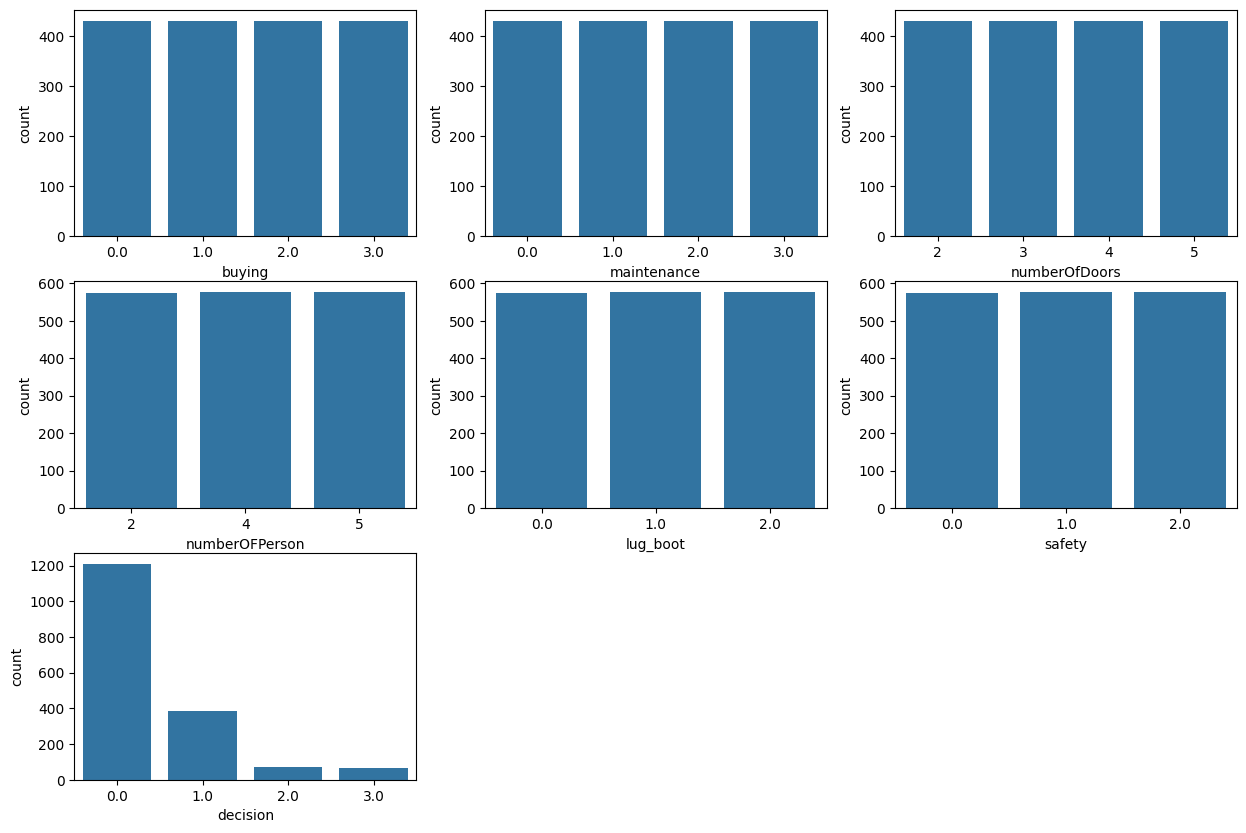

In [218]:
plt.figure(figsize=(15,10))
for i in range(len(df.columns)):
  plt.subplot(3,3,i+1)
  sns.countplot(x = df[True_column_list[i]])

<Axes: >

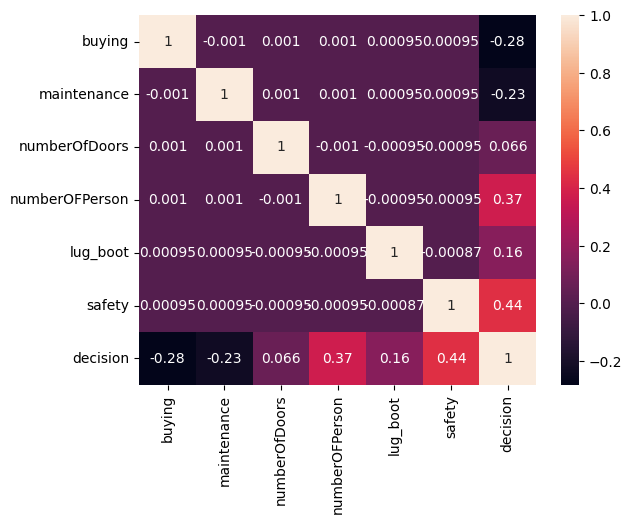

In [219]:
corr = df.corr()
sns.heatmap(corr,annot = True)

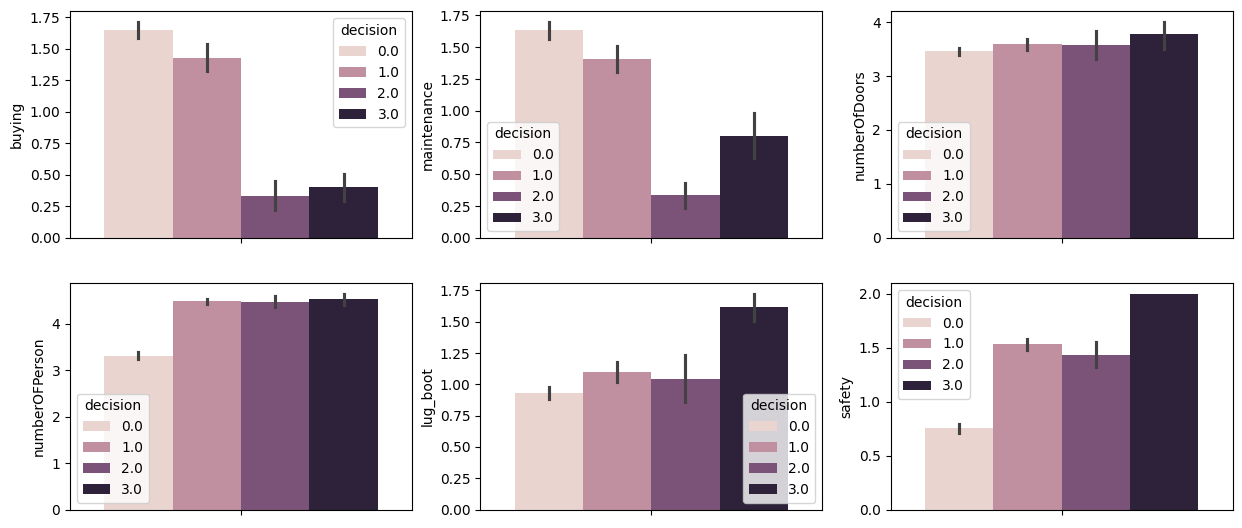

In [220]:
plt.figure(figsize=(15,10))
for i in range(len(df.columns)-1):
  plt.subplot(3,3,i+1)
  sns.barplot(y = df[True_column_list[i]],hue = df["decision"])

# **Machine Learning**

In [221]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.naive_bayes import CategoricalNB
from sklearn import tree

In [222]:
X = df.drop("decision",axis = 1)
Y = df["decision"]

In [223]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,random_state=42)

Accuracy 0.9653179190751445
Report               precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       237
         1.0       0.96      0.92      0.94        77
         2.0       0.75      0.80      0.77        15
         3.0       0.83      0.88      0.86        17

    accuracy                           0.97       346
   macro avg       0.88      0.90      0.89       346
weighted avg       0.97      0.97      0.97       346



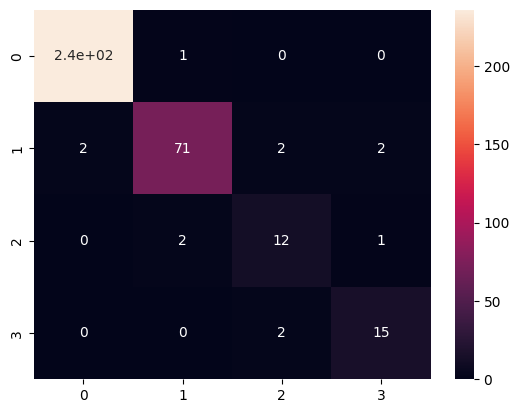

In [224]:
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
y_preds = model.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_preds))
print("Report",classification_report(y_test,y_preds))
sns.heatmap(confusion_matrix(y_test,y_preds),annot = True)
plt.show()

[Text(0.6119402985074627, 0.9615384615384616, 'safety <= 0.5\ngini = 0.452\nsamples = 1381\nvalue = [972, 307, 54, 48]'),
 Text(0.5970149253731343, 0.8846153846153846, 'gini = 0.0\nsamples = 467\nvalue = [467, 0, 0, 0]'),
 Text(0.6044776119402985, 0.9230769230769231, 'True  '),
 Text(0.6268656716417911, 0.8846153846153846, 'numberOFPerson <= 3.0\ngini = 0.576\nsamples = 914\nvalue = [505, 307, 54, 48]'),
 Text(0.6194029850746269, 0.9230769230769231, '  False'),
 Text(0.6119402985074627, 0.8076923076923077, 'gini = 0.0\nsamples = 299\nvalue = [299, 0, 0, 0]'),
 Text(0.6417910447761194, 0.8076923076923077, 'buying <= 1.5\ngini = 0.625\nsamples = 615\nvalue = [206, 307, 54, 48]'),
 Text(0.40298507462686567, 0.7307692307692307, 'maintenance <= 1.5\ngini = 0.652\nsamples = 298\nvalue = [41, 155, 54, 48]'),
 Text(0.2126865671641791, 0.6538461538461539, 'safety <= 1.5\ngini = 0.69\nsamples = 150\nvalue = [7, 49, 54, 40]'),
 Text(0.08955223880597014, 0.5769230769230769, 'lug_boot <= 0.5\ngini 

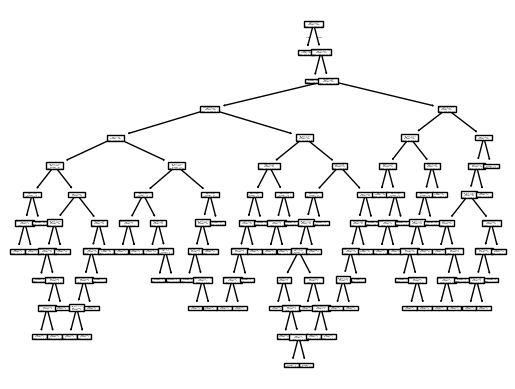

In [225]:
tree.plot_tree(model.fit(x_train,y_train),feature_names=True_column_list[:len(True_column_list)-1:])

In [226]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

Accuracy 0.9710982658959537
Report               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       237
         1.0       0.94      0.96      0.95        77
         2.0       0.82      0.60      0.69        15
         3.0       0.89      0.94      0.91        17

    accuracy                           0.97       346
   macro avg       0.91      0.88      0.89       346
weighted avg       0.97      0.97      0.97       346



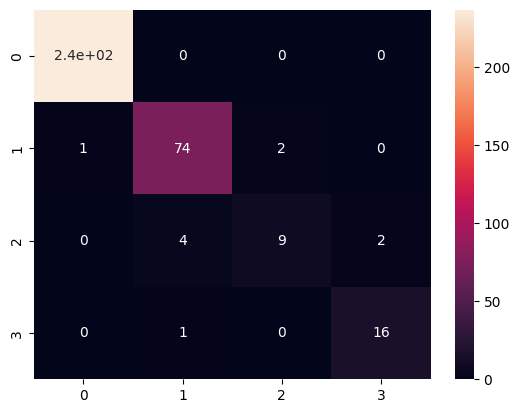

In [227]:
model = SVC()
model.fit(x_train,y_train)
y_preds = model.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_preds))
print("Report",classification_report(y_test,y_preds))
sns.heatmap(confusion_matrix(y_test,y_preds),annot = True)
plt.show()

Accuracy 0.9797687861271677
Report               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       237
         1.0       0.93      0.99      0.96        77
         2.0       1.00      0.67      0.80        15
         3.0       1.00      0.94      0.97        17

    accuracy                           0.98       346
   macro avg       0.98      0.90      0.93       346
weighted avg       0.98      0.98      0.98       346



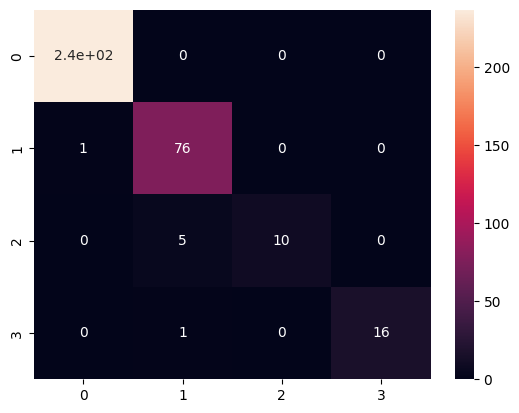

In [228]:
model = KNeighborsClassifier()
model.fit(x_train,y_train)
y_preds = model.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_preds))
print("Report",classification_report(y_test,y_preds))
sns.heatmap(confusion_matrix(y_test,y_preds),annot = True)
plt.show()

Accuracy 0.8554913294797688
Report               precision    recall  f1-score   support

         0.0       0.91      0.96      0.93       237
         1.0       0.72      0.65      0.68        77
         2.0       0.44      0.27      0.33        15
         3.0       0.79      0.88      0.83        17

    accuracy                           0.86       346
   macro avg       0.72      0.69      0.70       346
weighted avg       0.84      0.86      0.85       346



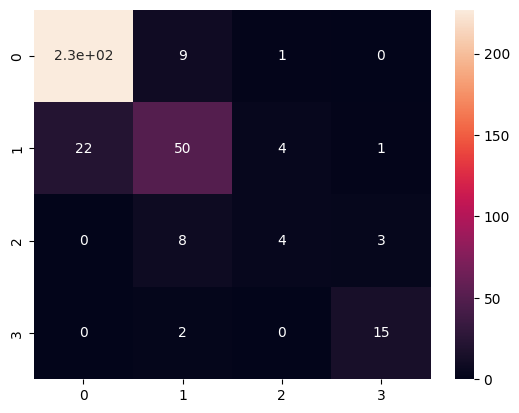

In [229]:

model = LogisticRegression()
model.fit(x_train,y_train)
y_preds = model.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_preds))
print("Report",classification_report(y_test,y_preds))
sns.heatmap(confusion_matrix(y_test,y_preds),annot = True)
plt.show()

In [230]:
criterion = ["gini","entropy","log_loss"]
splitter = ["random","best"]
max_depth = [5,6,15,None]

params = {"criterion":criterion,
          "splitter":splitter,
          "max_depth":max_depth}


Accuracy 0.9653179190751445
Report               precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       237
         1.0       0.96      0.92      0.94        77
         2.0       0.75      0.80      0.77        15
         3.0       0.83      0.88      0.86        17

    accuracy                           0.97       346
   macro avg       0.88      0.90      0.89       346
weighted avg       0.97      0.97      0.97       346



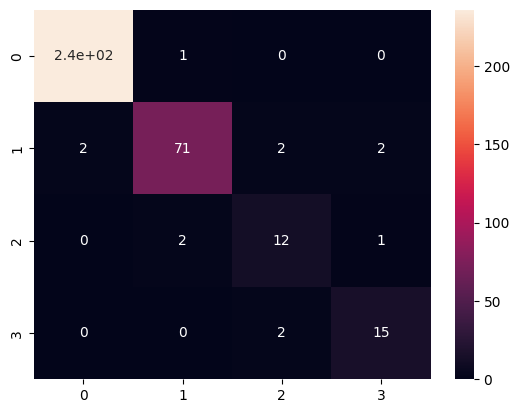

In [233]:
model = GridSearchCV(estimator = DecisionTreeClassifier(),param_grid=params)
model.fit(x_train,y_train)
y_preds = model.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_preds))
print("Report",classification_report(y_test,y_preds))
sns.heatmap(confusion_matrix(y_test,y_preds),annot = True)
plt.show()